In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False 

#generate a data set of 1000. 
#for simplicity, 10 in the first quadrant, another 10 in the third quadrant 
X1 = []
Y1 = []
X2 = []
Y2 = []

for i in range(1000):
    X1.append(random.uniform(0,1))
    Y1.append(random.uniform(0,1))
    X2.append(random.uniform(-1,0))
    Y2.append(random.uniform(-1,0))
    
#label the data
data1 = [np.array([1,X1[i],Y1[i],1]) for i in range(1000)]
data2 = [np.array([1,X2[i],Y2[i],-1]) for i in range(1000)]
data = data1 + data2
random.shuffle(data)

In [13]:
data

[array([ 1.        , -0.18550316, -0.32863703, -1.        ]),
 array([ 1.        , -0.22623807, -0.2723223 , -1.        ]),
 array([1.        , 0.79890011, 0.92077722, 1.        ]),
 array([ 1.        , -0.9185215 , -0.26481572, -1.        ]),
 array([1.        , 0.11394847, 0.58367053, 1.        ]),
 array([1.        , 0.09893502, 0.56733768, 1.        ]),
 array([1.        , 0.54273431, 0.0236021 , 1.        ]),
 array([1.        , 0.17496067, 0.14041419, 1.        ]),
 array([ 1.        , -0.67115892, -0.40542431, -1.        ]),
 array([1.        , 0.92055165, 0.10942386, 1.        ]),
 array([1.        , 0.83941151, 0.84902587, 1.        ]),
 array([ 1.        , -0.11338774, -0.96743167, -1.        ]),
 array([1.        , 0.62504824, 0.43377831, 1.        ]),
 array([1.        , 0.00398816, 0.58201811, 1.        ]),
 array([1.        , 0.0430203 , 0.31846314, 1.        ]),
 array([1.        , 0.49629529, 0.3769834 , 1.        ]),
 array([ 1.        , -0.61362647, -0.44439984, -1.  

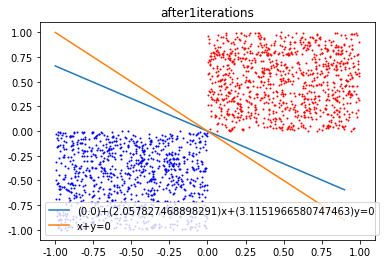

In [14]:

def sign(x):
    if x >= 0:
        return 1
    else:
        return -1


def Judge(x,w):
    flag = 1
    for i in x:
        if sign(i[:3].dot(w))*i[-1] < 0:
            flag = 0
            break
    return flag    

#number of iterations
s = 0
#initilizew=[0,0]
w=np.array([1,2,3],dtype = float)
while (Judge(data,w) == 0):
    i = data[random.randint(0,2*1000-1)]
    if sign(i[:3].dot(w))*i[-1]<0:
        w += i[-1]*i[:3]
        s += 1

#w0+w1*x+w2*y=0
X3=np.arange(-1,1,0.1)
Y3=np.array([(X3[i]*w[1]+w[0])/(-w[2]) for i in range(len(X3))])

#target function is x+y=0
X4 = np.arange(-1,1,0.1)
Y4 = - X4


plt.scatter(X1,Y1,c = 'r',s = 1)
plt.scatter(X2,Y2,c = 'b',s = 1)
plt.plot(X3,Y3,label = "("+str(w[0])+")+("+str(w[1])+")x+("+str(w[2])+")y=0")
plt.plot(X4,Y4,label = "x+y=0")
plt.title(u"after"+str(s)+u"iterations")
plt.legend()
plt.show()